# 👋🌍 Hello, world: Submit a Q# job to Quantinuum

In this notebook, we'll review the basics of Azure Quantum by submitting a simple *job*, or quantum program, to [Quantinuum](https://www.quantinuum.com/). We will use [Q#](https://docs.microsoft.com/azure/quantum/user-guide/) to express the quantum job.

## Submit a simple job Quantinuum using Azure Quantum
Azure Quantum provides several ways to express quantum programs. In this example we are using Q#, but note that Qiskit and Cirq are also supported. All code in this example will be written in Python and Q#.

Let's begin. When you see a code block, hover over it and click the triangle play-button to execute it. To avoid any compilation issues, this should be done in order from top to bottom.

### 1. Connect to the Azure Quantum workspace

To connect to the Azure Quantum service, call the `connect` function as seen below. This can take 30 seconds to run the first time, as the Q# environment is initializing.

In [1]:
import qsharp.azure
targets = qsharp.azure.connect(
   resourceId="",
   location="")

Preparing Q# environment...
.

Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace megan-aq-workspace in location eastus.


We can use the resulting object to see which _targets_ are available for submission.

In [2]:
import qsharp

print("This workspace's targets:")
for target in targets:
    print("-", target.id)

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.qpu.h1-2
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-2e
- quantinuum.qpu.h1


### ❕ Do you see `quantinuum.sim.h1-1sc` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add Quantinuum to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the Quantinuum provider. Don't worry, there's a free credits plan available.

### ❕ Do you see `quantinuum.sim.h1-1sc` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add Quantinuum to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the Quantinuum provider. Don't worry, there's a free credits plan available.

## Quantinuum: The quantum provider
Azure Quantum partners with third-party companies to deliver solutions to quantum jobs. These company offerings are called *providers*. Each provider can offer multiple *targets* with different capabilities. See the table below for Quantinuum's H1-1 device targets.

| Target name | Target ID | Number of qubits | Description|
| --- | ---| ---|---|
H1-1 Syntax Checker | `quantinuum.sim.h1-1sc` | 20 | Quantinuum's H1-1 Syntax Checker. This will return all zeros in place of actual or simulated results. Use this to validate quantum programs against the H1-1 compiler before submitting to hardware or emulators on Quantinuum's platform. Free of cost. |
H1-2 Syntax Checker | `quantinuum.sim.h1-2sc` | 20 | Quantinuum's H1-2 Syntax Checker. This will return all zeros in place of actual or simulated results. Use this to validate quantum programs against the H1-2 compiler before submitting to hardware or emulators on Quantinuum's platform. Free of cost.  |
H2-1 Syntax Checker | `quantinuum.sim.h2-1sc` | 32 | Quantinuum's H2-1 Syntax Checker. This will return all zeros in place of actual or simulated results. Use this to validate quantum programs against the H2-1 compiler before submitting to hardware or emulators on Quantinuum's platform. Free of cost.  |
H1-1 Emulator | `quantinuum.sim.h1-1e` | 20 | Quantinuum's H1-1 Emulator. Uses a realistic physical model and noise model of H1-1. |
H1-2 Emulator | `quantinuum.sim.h1-2e` | 20 | Quantinuum's H1-2 Emulator. Uses a realistic physical model and noise model of H1-2. |
H2-1 Emulator | `quantinuum.sim.h2-1e` | 32 | Quantinuum's H2-1 Emulator. Uses a realistic physical model and noise model of H2-1. |
H1-1 | `quantinuum.qpu.h1-1` | 20 | Quantinuum's H1-1 trapped ion device. |
H1-2 | `quantinuum.qpu.h1-2` | 20 | Quantinuum's H1-2 trapped ion device. |
H2-1 | `quantinuum.qpu.h2-1` | 32 | Quantinuum's H2-1 trapped ion device. |

For this example, we will use `quantinuum.sim.h1-2sc` to avoid any costs or credit usage. If you wish to emulate or run the actual circuit, you may replace all instances of `quantinuum.sim.h1-2sc` in subsequent code cells with one of the other values in the table above, but please note any costs incurred. To learn more about Quantinuum's targets, check out our [documentation](https://aka.ms/AQ/Quantinuum/Documentation).

### 2. Build the quantum program

Let's create a simple Q# program to run. This can take 30 seconds to run the first time, as the Q# environment is initializing.

In [3]:
# We declare the function we will define in Q# as a callable so that Python recognizes the symbol.
GenerateRandomBit: any = None

In [4]:
%%qsharp
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Convert;

operation GenerateRandomBit() : Result {
    use target = Qubit();

    // Apply an H-gate and measure.
    H(target);
    return M(target);
}

The program you built is a simple quantum random bit generator. With Quantinuum's Syntax Checker, we will be able to confirm that the circuit is able to be run on their H1 emulator and hardware.

### 3. Submit the quantum program to Quantinuum

We will use the `execute` function to run the quantum program above on Quantinuum's `quantinuum.sim.h1-1sc` target. This may take a minute or so ⏳. Your job will be packaged and sent to Quantinuum, where it will wait its turn to be run.

In [5]:
# Set the target to quantinuum.sim.h1-1sc
qsharp.azure.target("quantinuum.sim.h1-1sc")

# Execute the job. We'll use 100 shots (simulated runs). Timeout is in seconds.
result = qsharp.azure.execute(GenerateRandomBit, shots=100, jobName="Generate one random bit", timeout=240)

Loading package Microsoft.Quantum.Providers.Honeywell and dependencies...
Active target is now quantinuum.sim.h1-1sc
Submitting GenerateRandomBit to target quantinuum.sim.h1-1sc...
Job successfully submitted.
   Job name: Generate one random bit
   Job ID: 6d088975-5539-4585-b114-8e6ef44ac6da
Waiting up to 240 seconds for Azure Quantum job to complete...
[19:11:39] Current job status: Waiting
[19:11:44] Current job status: Succeeded


The job ID can be used to retrieve the results later using the `output` and `status` functions or by viewing it under the **Job management** section of the portal.

### 4. Visualize the job results
You can view a histogram of the results using [`pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html):


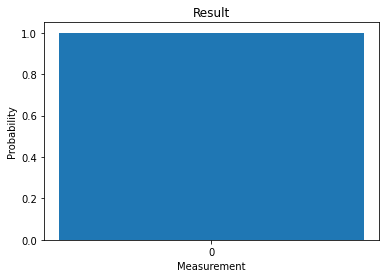

In [7]:
from matplotlib import pyplot

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.ylabel("Probability")
pyplot.xlabel("Measurement")

pyplot.show()

**See the histogram above? Congratulations, you've submitted a job with Azure Quantum! 👏**

### 5. Next steps
Next, you can try running a program on Quantinuum's emulation target - just replace `quantinuum.sim.h1-1sc` with `quantinuum.sim.h1-1e`. Or try another sample by navigating back to the sample gallery. The same "hello world" sample can be run with different quantum providers by choosing another option in the gallery card drop-down menu. Don't worry - your work here is automatically saved.

To learn more about submitting jobs to Azure Quantum using Q#, refer to [this documentation](https://docs.microsoft.com/azure/quantum/how-to-submit-jobs?pivots=ide-python).

To learn more about job pricing, review the [Azure Quantum documentation on job costs](https://docs.microsoft.com/azure/quantum/azure-quantum-job-costs).